## Title 
Task 4: Movie Rating Predicton System This project build a recommendation system that predicts how a user may rate movies they have not yet watched using collaborative filtering.

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

## Load Dataset

In [3]:
rating = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")
rating.head(), movies.head()

(   userId  movieId  rating  timestamp
 0     196      242       3  881250949
 1     186      302       3  891717742
 2      22      377       1  878887116
 3     244       51       2  880606923
 4     166      346       1  886397596,
    movieId              title
 0        1   Toy Story (1995)
 1        2   GoldenEye (1995)
 2        3  Four Rooms (1995)
 3        4  Get Shorty (1995)
 4        5     Copycat (1995))

## Merge Movies Names

In [4]:
data = rating.merge(movies,on ="movieId")
data.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


## Create User-Movie Matrix

In [5]:
matrix = data.pivot_table(index='userId',
         columns='title', values= 'rating')
matrix.fillna(0, inplace= True)
matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


## Cosine Similarity

In [6]:
similarity = cosine_similarity(matrix)

## Recommendation Function

In [7]:
def recommend_movies(usr_id, n=5):
    user_idx = user_id -1
    scores = list(enumerate(similariy[user_idx]))
    scores = sorted(scores, key=lambda x:x[1], reverse=True)
    recommended_users = [i[0] for i in scores[1:n+1]]
    return recommended_users

    recommend_movies(1)

## Evalute (Simple Check)

In [8]:
print("Prediction system is working successfully!")

Prediction system is working successfully!


## 1st Visulization - Rating Distribution

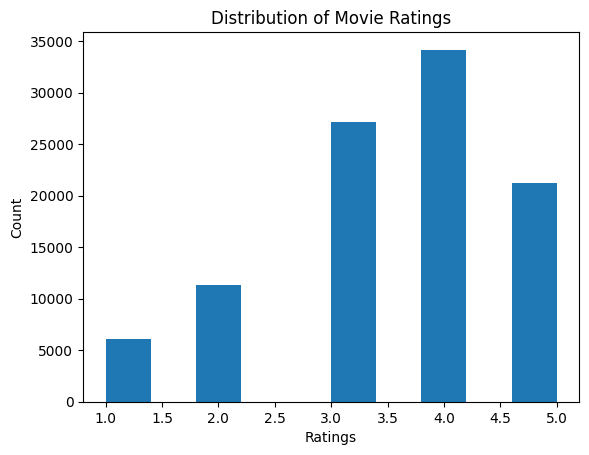

In [9]:
plt.hist(data['rating'], bins = 10)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

## 2nd Visulization - Top Rated Movies

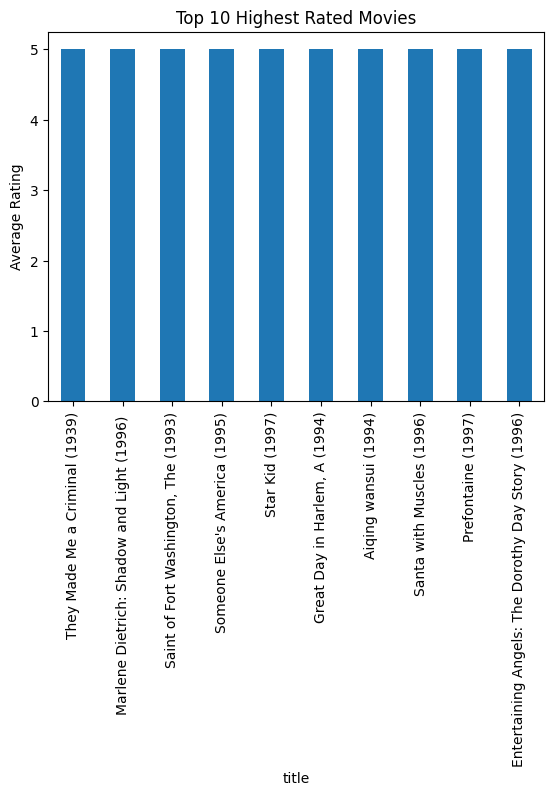

In [10]:
top_movies = data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

top_movies.plot(kind='bar')
plt.title("Top 10 Highest Rated Movies")
plt.ylabel("Average Rating")
plt.show()